# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Milou| secret|
|Noor| secret|
|Mick| secret|
| | |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [2]:
#!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import  Graph

In [3]:
g=Graph()
g.parse('http://dbpedia.org/resource/Michael_Jackson')

<Graph identifier=Nb944f0daff1244e6873cf96b570b5086 (<class 'rdflib.graph.Graph'>)>

In [4]:
triples= [triple for triple in g]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/Evgenia_Kosigina'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Scarecrow_(Oz)'))],
 9368)

In [5]:
qres = g.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult,
 9368,
 [(rdflib.term.URIRef('http://dbpedia.org/resource/Evgenia_Kosigina'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Scarecrow_(Oz)'))])

## Van Networkx naar RDF
Om te beginnen moet er een networkx graph gevormd worden waarmee we onze uiteindelijke networkx2rdf(G) functie mee kunnen testen. Hieronder is een uitgebreid netwerk te zien van verschillende ouder-kindrelaties tussen personen. Alle nodes zijn onderverdeeld in een subset die bepaalt of de node man of vrouw is; het gender. De nodes krijgen als attribuut het gender mee. Met behulp van dit netwerk laten wij zien hoe je het makkelijk omzet naar een set met RDF triples.

In [6]:
from rdflib import  Graph, Literal, URIRef, Namespace
import networkx as nx

/Users/miloudesevaux/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/miloudesevaux/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


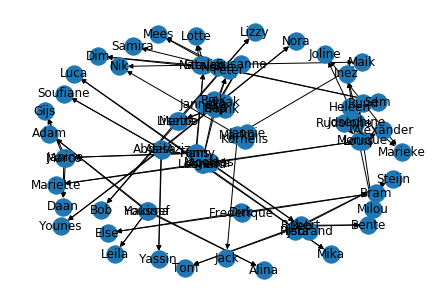

In [7]:
# Sets met mannelijke en vrouwelijke nodes
m = {'Maik', 'Nik', 'Marko', 'Jaap', 'Kornelis', 'Peter', 'Leonard', 'Menno', 'Sem', 'Mees', 'Dim', 'Luca', 'Mika', 'Bob', 'Steijn', 'Tom', 'Daan', 'Gijs', 'Robert', 'Steven', 'IJsbrand', 'Hans', 'Marco', 'AbdelAziz', 'Soufiane', 'Yassin', 'Younes', 'Youssef', 'Adam', 'Louis', 'Alexander', 'Nicolaas', 'Rudolphe', 'Ruud', 'Dirk', 'Bram', 'Jack', 'Sjaak', 'Henk'} 
v = {'Susanne', 'Bep', 'Jannie', 'Nellie', 'Karen', 'Lisette', 'Lizzy', 'Bente', 'Lotte', 'Beb', 'Natalie', 'Pieta', 'Tonny', 'Janine', 'Asisa','Nora', 'Hakima', 'Leila', 'Alina', 'Milou', 'Monique', 'Inez', 'Agatha', 'Josephine', 'Mariette', 'Marieke', 'Joline', 'Heleen', 'Else', 'Frederique', 'Samira', 'Riek', 'Janneke'}

# Set met edges, in dit geval ouder-kindrelaties, tussen de nodes
ouder_van = { ('Marko', 'Nik'), ('Marko', 'Maik'), ('Susanne', 'Nik'), ('Susanne', 'Maik'), ('Jaap', 'Susanne'), ('Bep', 'Susanne'), ('Kornelis', 'Marko'), ('Jannie', 'Marko'),
              ('Jaap', 'Peter'), ('Jaap', 'Menno'), ('Jaap', 'Karen'), ('Bep', 'Peter'), ('Bep', 'Menno'), ('Bep', 'Karen'),
              ('Peter', 'Sem'), ('Peter', 'Mees'), ('Peter', 'Dim'), ('Nellie', 'Sem'), ('Nellie', 'Mees'), ('Nellie', 'Dim'),
              ('Leonard', 'Luca'), ('Leonard', 'Mika'), ('Karen', 'Luca'), ('Karen', 'Mika'), ('Menno', 'Bob'), ('Menno', 'Lizzy'), ('Lisette', 'Bob'), ('Lisette', 'Lizzy'),
              ('Robert', 'Steijn'), ('Robert', 'Tom'), ('Robert', 'Bente'), ('Beb', 'Steijn'),
              ('Beb', 'Bente'), ('Beb', 'Tom'), ('Marco', 'Daan'), ('Marco', 'Gijs'), ('Janine', 'Daan'),
              ('Janine', 'Gijs'), ('Steven', 'Lotte'), ('Natalie', 'Lotte'), ('Pieta', 'Robert'), ('IJsbrand', 'Robert'),
              ('Hans', 'Janine'), ('Hans', 'Beb'), ('Hans', 'Steven'), ('Tonny', 'Janine'), ('Tonny', 'Beb'),
              ('Tonny', 'Steven'), ('AbdelAziz', 'Soufiane'),('AbdelAziz','Yassin'),('AbdelAziz','Younes'),('AbdelAziz','Nora'),('Asisa', 'Soufiane'),('Asisa','Yassin'),('Asisa','Younes'),('Asisa','Nora'),('Youssef','Adam'),('Youssef','Leila'),('Youssef','Alina'),('Hakima','Adam'),('Hakima','Leila'),('Hakima','Alina'),
              ('Monique', 'Milou'), ('Monique', 'Inez'), ('Monique', 'Alexander'), ('Louis', 'Milou'), ('Louis', 'Inez'), 
              ('Louis', 'Alexander'), ('Agatha', 'Monique'), ('Nicolaas', 'Monique'), ('Rudolphe', 'Louis'), 
              ('Josephine', 'Louis'), ('Agatha', 'Mariette'), ('Nicolaas', 'Mariette'), ('Josephine', 'Ruud'), 
              ('Rudolphe', 'Ruud'), ('Dirk', 'Else'), ('Dirk','Bram'), ('Frederique', 'Else'), ('Frederique', 'Bram'), 
              ('Ruud', 'Joline'), ('Ruud', 'Marieke'), ('Heleen', 'Joline'), ('Heleen', 'Marieke'), ('Marko', 'Jack'), ('Nellie', 'Samira'),
              ('Sjaak', 'Bep'), ('Riek', 'Bep'), ('Henk', 'Jaap'), ('Janneke', 'Jaap')}

# Voeg nodes met attributen toe en de edges tussen de nodes
F = nx.DiGraph()
F.add_nodes_from(m)
F.add_nodes_from(v)
F.add_edges_from(ouder_van, rel ='parent')

for n in m:
    F.nodes[n]['gender'] = 'M'
for n in v:
    F.nodes[n]['gender'] = 'V'   

nx.draw(F, with_labels=True)


De functie Networkx2RDF(G) zet elke directed graph om tot een simpele RDF set met triples. De triples bestaan uit een tuple van een (object, property en subject). De property bepaalt de relatie of verhouding tussen object en subject, het subject kan een attribute zijn van het object of juist een bepaalde relatie hebben met het object, enzovoort.

In de functie Networkx2RDF(G) wordt met behulp van Namespace een RDF triple store gemaakt van een networkx Graph. De triples worden gevormd uit zowel de nodes als edges. De edges worden opgeslagen als object en subject, met als property de relatie tussen de edges, ofwel de edge attributes. De nodes worden tot triples omgezet door als object de node zelf te nemen, als property een bepaalde eigenschap van de node gebaseerd op het subject; de node attribute.

In [8]:
def Networkx2RDF(G):
    r = Graph()
    ex = Namespace("http://FNWIFamilieleden.com/")
    
    r.bind('ex', ex)

    for edge in G.edges:
        r.add((ex[edge[0]], ex[list(G[edge[0]][edge[1]].values())[0]] , ex[edge[1]]))
        
    for node in G.nodes:
        for i in G.nodes[node]:
            r.add((ex[node], ex[i], Literal(G.nodes[node][i])))

    return r

K = Networkx2RDF(F)

list(K)[:10]

[(rdflib.term.URIRef('http://FNWIFamilieleden.com/Janine'),
  rdflib.term.URIRef('http://FNWIFamilieleden.com/parent'),
  rdflib.term.URIRef('http://FNWIFamilieleden.com/Gijs')),
 (rdflib.term.URIRef('http://FNWIFamilieleden.com/IJsbrand'),
  rdflib.term.URIRef('http://FNWIFamilieleden.com/gender'),
  rdflib.term.Literal('M')),
 (rdflib.term.URIRef('http://FNWIFamilieleden.com/Youssef'),
  rdflib.term.URIRef('http://FNWIFamilieleden.com/parent'),
  rdflib.term.URIRef('http://FNWIFamilieleden.com/Leila')),
 (rdflib.term.URIRef('http://FNWIFamilieleden.com/Lisette'),
  rdflib.term.URIRef('http://FNWIFamilieleden.com/gender'),
  rdflib.term.Literal('V')),
 (rdflib.term.URIRef('http://FNWIFamilieleden.com/Rudolphe'),
  rdflib.term.URIRef('http://FNWIFamilieleden.com/gender'),
  rdflib.term.Literal('M')),
 (rdflib.term.URIRef('http://FNWIFamilieleden.com/Marko'),
  rdflib.term.URIRef('http://FNWIFamilieleden.com/parent'),
  rdflib.term.URIRef('http://FNWIFamilieleden.com/Nik')),
 (rdflib.te

## SPARQL in de family tree
K is een gedetailleerdere RDF Graph gevormd uit de directed networkx graph van de familierelaties. De edges tussen de nodes zijn ouder-kind relaties. In deze RDF set worden de networkx node attribute van het geslacht omgezet tot properties in de RDF set zodat  ook met behulp van SPARQL queries uit gehaald kunnen worden.
Met SPARQL kan in de Graph worden gezocht naar bepaalde relaties tussen objecten en subjecten door middel van de properties. Hieronder zijn de familierelaties gezocht die onder andere gevonden kunnen worden vanuit de RDF set die is gemaakt op basis van de Directed Graph in networkx.

In de queries is het object telkens gedefinieert als ?o en het uiteindelijke subject ?s.

In [9]:
ouder = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE { ?o :parent ?s } """)

moeder = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE {?o :parent ?s .
    ?o :gender ?gender .
    FILTER(?gender = ("V"))}""")

vader = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE {?o :parent ?s .
    ?o :gender ?gender .
    FILTER(?gender = ("M"))}""")

dochter = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE {?s :parent ?o .
    ?o :gender ?gender .
    FILTER(?gender = ("V"))}""")

zoon = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE {?s :parent ?o .
    ?o :gender ?gender .
    FILTER(?gender = ("M"))}""")

zus = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE {?x :parent ?o .
    ?x :parent ?s .
    ?o :gender ?gender .
    FILTER(?gender = ("V"))}""")

broer = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE {?x :parent ?o .
    ?x :parent ?s .
    ?o :gender ?gender .
    FILTER(?gender = ("M"))}""")

oma = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE {?o :parent ?p . 
    ?p :parent ?s .
    ?o :gender ?gender .
    FILTER(?gender = "V")}""")

opa = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE {?o :parent ?p . 
    ?p :parent ?s .
    ?o :gender ?gender .
    FILTER(?gender = "M")}""")

nicht = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE {?x :parent ?y .
    ?x :parent ?z .
    ?y :parent ?o .
    ?z :parent ?s .
    ?o :gender ?gender .
    FILTER(?gender = "V" && ?y != ?z)}""")

neef = K.query("""
    PREFIX : <http://FNWIFamilieleden.com/>
    SELECT DISTINCT ?o ?s
    WHERE {?x :parent ?y .
    ?x :parent ?z .
    ?y :parent ?o .
    ?z :parent ?s .
    ?o :gender ?gender .
    FILTER(?gender = "M" && ?y != ?z)}""")

list(ouder)[:2], list(moeder)[:2], list(vader)[:2], list(zus)[:2], list(broer)[:2]

([(rdflib.term.URIRef('http://FNWIFamilieleden.com/Janine'),
   rdflib.term.URIRef('http://FNWIFamilieleden.com/Gijs')),
  (rdflib.term.URIRef('http://FNWIFamilieleden.com/Nellie'),
   rdflib.term.URIRef('http://FNWIFamilieleden.com/Sem'))],
 [(rdflib.term.URIRef('http://FNWIFamilieleden.com/Asisa'),
   rdflib.term.URIRef('http://FNWIFamilieleden.com/Soufiane')),
  (rdflib.term.URIRef('http://FNWIFamilieleden.com/Asisa'),
   rdflib.term.URIRef('http://FNWIFamilieleden.com/Younes'))],
 [(rdflib.term.URIRef('http://FNWIFamilieleden.com/IJsbrand'),
   rdflib.term.URIRef('http://FNWIFamilieleden.com/Robert')),
  (rdflib.term.URIRef('http://FNWIFamilieleden.com/Rudolphe'),
   rdflib.term.URIRef('http://FNWIFamilieleden.com/Louis'))],
 [(rdflib.term.URIRef('http://FNWIFamilieleden.com/Marieke'),
   rdflib.term.URIRef('http://FNWIFamilieleden.com/Joline')),
  (rdflib.term.URIRef('http://FNWIFamilieleden.com/Marieke'),
   rdflib.term.URIRef('http://FNWIFamilieleden.com/Marieke'))],
 [(rdflib.t

## Van RDF naar Networkx
Wij hebben een triple store over Amsterdam geselecteerd met verschillende properties. De property die wij met SPARQL eruit hebben gehaald zijn alle triples waarbij is weergegeven dat Amsterdam de plek is waar het object is gestorven. De nodes in het netwerk zijn dus alle personen uit de triple store die uit de SPARQL query kwamen en de node Amsterdam. Het netwerk wat daaruit komt is een soort spin, alle nodes zijn verbonden met de Amsterdam node. De edges zijn gevormd uit de deathPlace property.

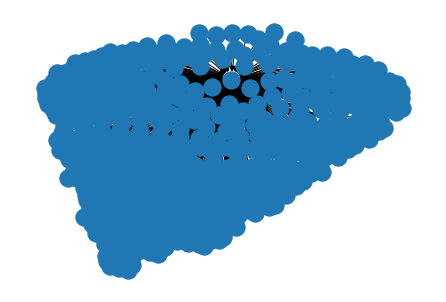

In [10]:
e=Graph()
e.parse('http://dbpedia.org/resource/Amsterdam')

death = e.query(""" PREFIX dbo: <http://dbpedia.org/ontology/>
                    SELECT DISTINCT ?o ?s WHERE {?o dbo:deathPlace ?s}""")

nodes = [x for ((x,y)) in death]

E = nx.DiGraph()

E.add_nodes_from(nodes)
E.add_edges_from(list(death))

nx.draw_spring(E)

